In [1]:
from neuron import h

In [2]:
from neuron.units import ms, mV, µm
from matplotlib import pyplot as plt

In [3]:
h.load_file("stdrun.hoc")

1.0

In [4]:
IAF = h.IntFire1()
IAF.tau = 20 # time constant
IAF.refrac = 5 # refractory period

In [5]:
stim = h.NetStim()
stim.number = 25
stim.interval = 2
stim.start = 0
stim.noise = 1 # 0 - deterministic, 1 - Poisson process
ncstim = h.NetCon(stim, IAF, 0, 0, 0.3)

In [6]:
mvec = h.Vector().record(IAF._ref_m)

In [7]:
#modify advance() procedure in stdrun.hoc
h("""
proc advance() {
    fadvance()
    m1 = IntFire1[0].M()
  }""")
Mvec = h.Vector().record(h._ref_m1)  # M vector

In [8]:
spike_times_vec_IAF = h.Vector()
idvec_IAF = h.Vector()
nc = h.NetCon(IAF, None)
nc.record(spike_times_vec_IAF, idvec_IAF, 1)

spike_times_vec_input = h.Vector()
idvec_input = h.Vector()
nc = h.NetCon(stim, None)
nc.record(spike_times_vec_input, idvec_input, -1)
h.finitialize()

soma = h.Section(name = "soma")
t = h.Vector().record(h._ref_t)  # Time stamp vector

In [9]:
# simulation control
tstop = 100
h.dt = 0.025
h.finitialize()
h.continuerun(tstop * ms)


0.0

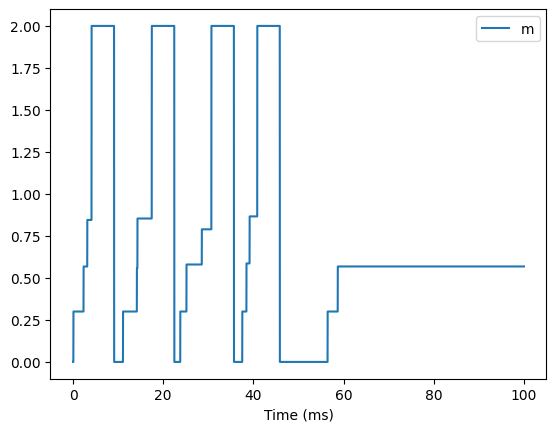

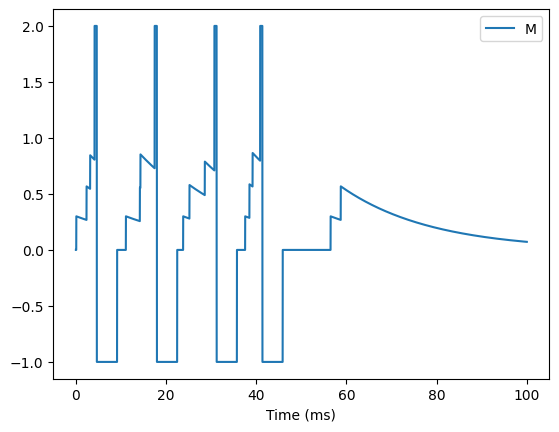

In [10]:
plt.figure()
plt.plot(t, mvec, label = "m")
plt.legend(loc = 1)
plt.xlabel('Time (ms)')
plt.savefig('Fig1.jpg')
#plt.show(0)

plt.figure()
plt.plot(t, Mvec, label = "M")
plt.legend(loc = 1)
plt.xlabel('Time (ms)')
plt.savefig('Fig2.jpg')
#plt.show(0)

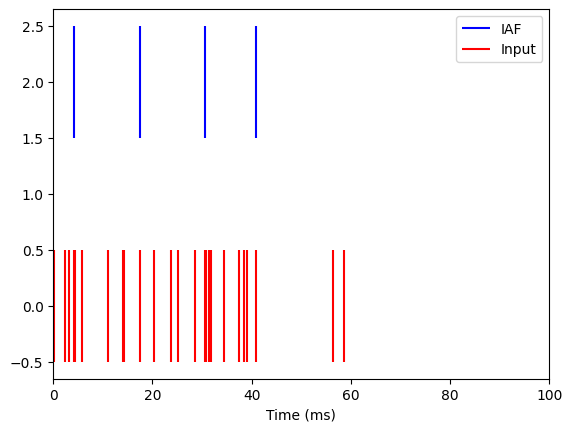

In [11]:
fig, ax = plt.subplots()
for times, id in zip(spike_times_vec_input, idvec_input):
    Input = ax.vlines(times, id+0.5,id+1.5,'Red')
for times, id in zip(spike_times_vec_IAF, idvec_IAF):
    IAF_cell = ax.vlines(times, id+0.5,id+1.5,'Blue')
ax.legend([IAF_cell, Input], ['IAF', 'Input'])
ax.set_xlabel('Time (ms)')
ax.set_xlim([0, tstop])
plt.savefig('Fig3.jpg')
plt.show()

In [12]:
t.printf(1,10)

0.025	0.05	0.075	0.1	0.125	
0.15	0.175	0.2	0.225	0.25	



10